In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')
import matplotlib
import pandas as pd
import os
import re
from tqdm import tqdm
from dspeed.processors.trap_filters import trap_norm

color_array=np.linspace(0,1,11)
cmap = plt.cm.tab20b

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>")) #makes the notebook wider
plt.style.use('default')
#grid size and detector name should be attributes

In [2]:
sim_time=6000
time_step_calc = 0.2
n_iter = sim_time/time_step_calc
step_time_out = 10/time_step_calc #out every step for now
time = np.linspace(start=0, stop= n_iter*time_step_calc - step_time_out*time_step_calc, num= (int) (n_iter/step_time_out))

In [3]:
# time= time[:len(time)-1]

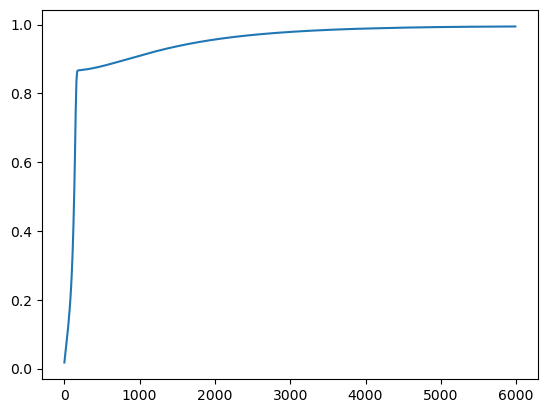

In [11]:
test_wf0=np.loadtxt("/nas/longleaf/home/kbhimani/siggen_ccd/waveforms/5000.00_keV/grid_0.0500/self_repulsion_1/P42575A/q=0.00/signal_r=15.00_phi=0.00_z=0.10.txt")
plt.plot(time, test_wf0)


In [6]:
# import os
# import datetime

# def delete_old_files(directory, days=2):
#     """Deletes files older than a specified number of days in a given directory."""
#     # Get the current time
#     now = datetime.datetime.now()

#     # Iterate over all files in the directory
#     for filename in os.listdir(directory):
#         filepath = os.path.join(directory, filename)

#         # Ensure that it's a file
#         if os.path.isfile(filepath):
#             # Get the file's last modified time
#             file_mod_time = datetime.datetime.fromtimestamp(os.path.getmtime(filepath))

#             # Calculate the difference in days
#             if (now - file_mod_time).days > days:
#                 # print(f"Deleting file: {filename}")
#                 os.remove(filepath)
#                 # print(f"Deleted: {filename}")
#             # else:
#             #     print(f"File is not older than {days} days: {filename}")

# # Usage example
# # directory_path = '/nas/longleaf/home/kbhimani/siggen_ccd/waveforms/7.50_keV/grid_0.0200/self_repulsion_1/OPPI/q=-0.30/'
# directory_path = '/nas/longleaf/home/kbhimani/siggen_ccd/waveforms/30.20_keV/grid_0.0200/self_repulsion_1/OPPI/q=-0.30/'

# delete_old_files(directory_path)


In [7]:
directory = '/nas/longleaf/home/kbhimani/siggen_ccd/waveforms'
energy=np.array([])
grid=np.array([])
sr=np.array([])
detector=np.array([])
surface_charge=np.array([])
radius=np.array([])
height=np.array([])
phi=np.array([])
charge_data = np.empty((0,len(time)),dtype=float)
for filename in tqdm(os.listdir(directory)):
    if('_keV' in filename):
        energy_val = filename.split("_")[0]
        for filename_g in (os.listdir(directory + '/' + filename)):
            if('grid' in directory + '/' + filename_g):
                grid_val = filename_g.split("_")[1]
                for filename_e in (os.listdir(directory + '/' + filename + '/' + filename_g)):
                    if('self_repulsion' in filename_e):
                        sr_val = filename_e.split("_")[2]
                        for filename_sr in (os.listdir(directory + '/' + filename + '/' + filename_g + '/' + filename_e)):
                            if (filename_sr.startswith('.')) == False:
                                det_val = filename_sr
                                for filename_det in (os.listdir(directory + '/' + filename + '/' + filename_g + '/' + filename_e + '/' + filename_sr)):
                                    if ('q=' in filename_det):
                                        q_val = filename_det.split("=")[1]
                                        for filename_q in (os.listdir(directory+'/'+filename+'/'+ filename_g+'/'+filename_e+'/'+filename_sr+'/'+filename_det)):
                                            if('signal_' in filename_q):
                                                data = np.loadtxt(directory+'/'+filename+'/'+filename_g+'/'+filename_e+'/'+filename_sr+'/'+filename_det+'/'+ filename_q)
                                                # print(directory+'/'+filename+'/'+filename_g+'/'+filename_e+'/'+filename_sr+'/'+filename_det+'/'+ filename_q)
                                                if(len(data)==len(time)):
                                                    r_val = filename_q.split("_")[1].split("=")[1]
                                                    phi_val = filename_q.split("_")[2].split("=")[1]
                                                    z_temp = filename_q.split("_")[3].split("=")[1].split(".")
                                                    z_val = z_temp[0]+"."+z_temp[1]
                                                    energy = np.append(energy, float(energy_val))
                                                    grid = np.append(grid,float(grid_val))
                                                    radius = np.append(radius, float(r_val))
                                                    height = np.append(height, float(z_val))
                                                    phi = np.append(phi, float(phi_val))
                                                    sr = np.append(sr, float(sr_val))
                                                    detector = np.append(detector, det_val)
                                                    surface_charge = np.append(surface_charge, float(q_val))
                                                    charge_data = np.vstack([charge_data, data])

100%|██████████| 4/4 [00:02<00:00,  1.88it/s]


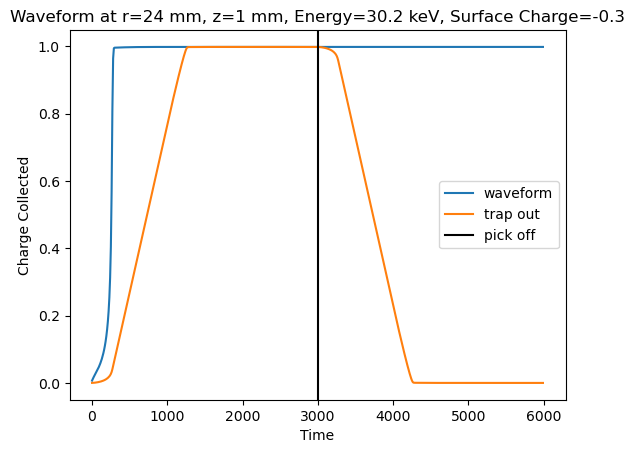

In [8]:
# 4, 2.5, 4, 
cut = (radius == 25.00) & (sr == 1) & (height == 0.6) & (grid == 0.0200) & (energy == 30.2) & (surface_charge==-0.30) &(detector=="OPPI")
test_wf = charge_data[cut][0]
y=plt.plot(time,test_wf,label="waveform")
trap_out = np.zeros_like(test_wf)
trap_norm(test_wf,100,200,trap_out)
plt.plot(time,trap_out, label="trap out")
plt.axvline(3000, markersize=0.1, c='black', label="pick off")
plt.xlabel('Time')
plt.ylabel('Charge Collected')
plt.title('Waveform at r=24 mm, z=1 mm, Energy=30.2 keV, Surface Charge=-0.3')
plt.legend(fancybox=True)
plt.savefig("figs/trap_sample.png",dpi=100)

In [9]:
rise = 100 # 100 sample of 10 ns so 1 us
flat = 200 # 2 us
pickoff= 300 #3 us

# det = "P42575A"
det = "OPPI"
sc = -0.3
eng = 30.2
energy_init=[]
energy_estimate=[]
r_plot=[]
z_plot=[]
# for e in energy:
for r in tqdm(radius):
    for z in height:
        cut = (radius == r) & (sr == 1) & (height == z) & (grid == 0.0200) & (energy == eng) & (surface_charge==sc) &(detector==det)
        if charge_data[cut].size > 0:  # Check if the filtered array is not empty
            test_wf = charge_data[cut][0]
            trap_out = np.zeros_like(test_wf)
            trap_norm(test_wf, rise, flat, trap_out)
            energy_estimate.append(trap_out[time == pickoff * 10][0])
            # energy_init.append(e)
            r_plot.append(r)
            z_plot.append(z)
        else:
            continue

100%|██████████| 1841/1841 [04:25<00:00,  6.92it/s]


Text(0.5, 1.0, 'Activeness map for OPPI detector\n Initial Energy=30.2 keV, Surface Charge=-0.3')

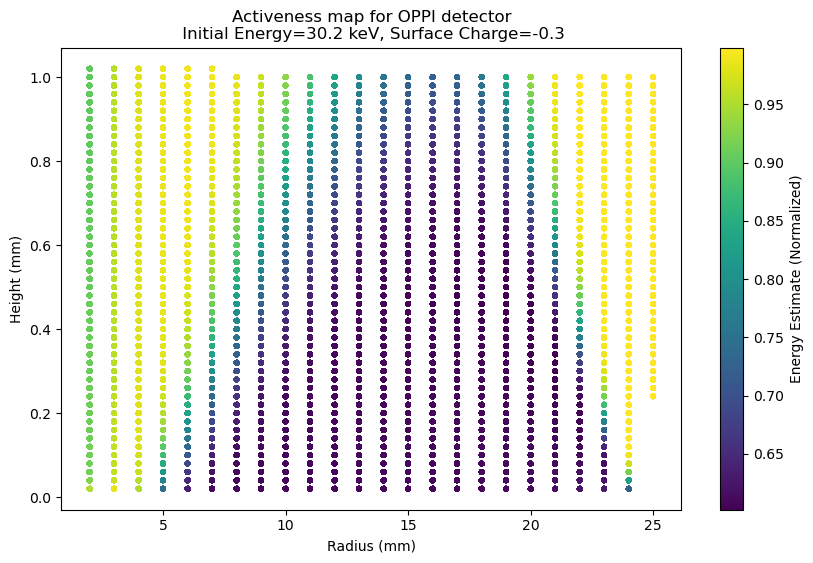

In [12]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

# Assuming r_plot, z_plot, and energy_estimate are populated lists of equal length
# And that energy_estimate values are between 0 and 1 (as per your requirement)
# If they are not, you may need to normalize them to fit in this range.

# Convert lists to numpy arrays for easier handling
r_plot = np.array(r_plot)
z_plot = np.array(z_plot)
energy_estimate = np.array(energy_estimate)

# Ensure all energy_estimate values are within the range 0 to 1
energy_estimate = np.clip(energy_estimate, 0, 1)

# Create scatter plot
plt.figure(figsize=(10, 6))
sc = plt.scatter(r_plot, z_plot, c=energy_estimate, cmap=cm.viridis, s=9) #, c=energy_estimate, cmap=cm.viridis
# plt.plot(15.5, 0.02, 'rx')
# plt.plot(4.5, 0.1, 'rx')
# plt.plot(24.5, 0.5, 'rx')
plt.colorbar(sc, label='Energy Estimate (Normalized)')
plt.xlabel('Radius (mm)')
plt.ylabel('Height (mm)')
# plt.ylim(0,0.09)
plt.title('Activeness map for OPPI detector\n Initial Energy=30.2 keV, Surface Charge=-0.3')
# plt.savefig("figs/deadness_test_scatter.png",dpi=100)

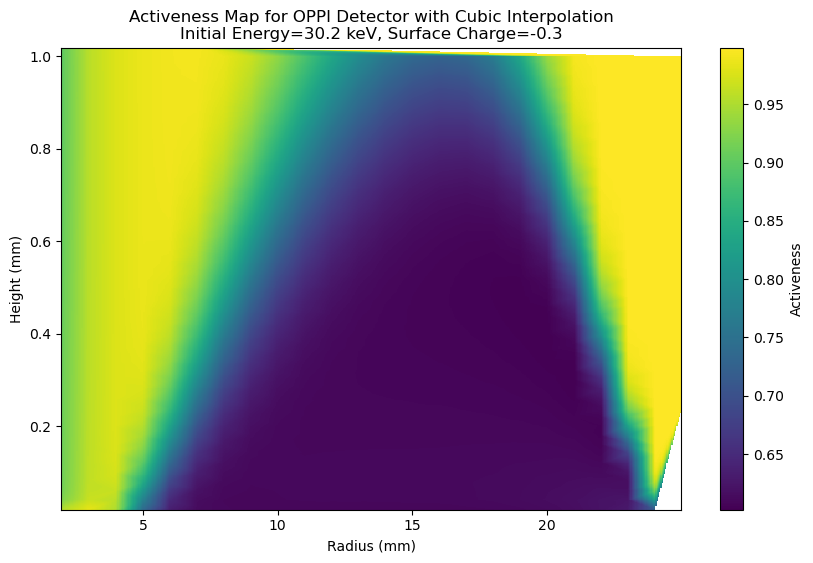

In [13]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from scipy.interpolate import griddata

# Assuming r_plot, z_plot, and energy_estimate are numpy arrays of equal length

# Define grid size
grid_size = 500

# Create a grid for interpolation
r_lin = np.linspace(r_plot.min(), r_plot.max(), grid_size)
z_lin = np.linspace(z_plot.min(), z_plot.max(), grid_size)
r_grid, z_grid = np.meshgrid(r_lin, z_lin)

# Interpolate the data
energy_interp = griddata((r_plot, z_plot), energy_estimate, (r_grid, z_grid), method='linear')

# Adjust the dimensions of energy_interp to fit the grid
energy_interp_adjusted = energy_interp[:-1, :-1]

energy_interp_clipped = np.clip(energy_interp_adjusted, 0, 1)

# Create heatmap
plt.figure(figsize=(10, 6))
heatmap = plt.pcolormesh(r_grid[:-1, :-1], z_grid[:-1, :-1], energy_interp_clipped, cmap=cm.viridis)
# plt.plot(15.5, 0.02, 'rx')
# plt.plot(4.5, 0.1, 'rx')
# plt.plot(24.5, 0.5, 'rx')
plt.colorbar(heatmap, label='Activeness')
plt.xlabel('Radius (mm)')
plt.ylabel('Height (mm)')
# plt.ylim(0,0.08)

plt.title('Activeness Map for OPPI Detector with Cubic Interpolation\nInitial Energy=30.2 keV, Surface Charge=-0.3')
# plt.grid(True)
# plt.savefig("figs/deadness_test_cubic_fit.png", dpi=100)
plt.show()


In [24]:
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import numpy as np

# Test points
test_points = [(15.5, 0.02), (4.5, 0.1), (24.5, 0.5)]

# Interpolate and print results at test points
for point in test_points:
    interpolated_value = griddata((r_plot, z_plot), energy_estimate, point, method='cubic')
    print(f"Interpolated energy estimate at r={point[0]}, z={point[1]}: {interpolated_value}")

Interpolated energy estimate at r=15.5, z=0.02: 0.6086223172833009
Interpolated energy estimate at r=4.5, z=0.1: 0.9383039771643263
Interpolated energy estimate at r=24.5, z=0.5: 0.9978415440178081


In [ ]:
# #!/usr/local/bin/python3
# import matplotlib.pyplot as plt
# import matplotlib.colors as colors
# import numpy as np

# matplotlib.use('Agg')

# def generate_filename(n, prefix='ed'):
#     return f'{prefix}{n:03}.dat'

# def load_data(file_path, file_name):
#     return np.loadtxt(file_path + file_name)

# def prepare_plot_data(data, z_index=2, max_z=None):
#     x, y = set(data[:,0]), set(data[:,1])
#     zvals = data[:,z_index].reshape(len(x), len(y))
#     zvals = np.where(zvals < 1.1e-12, 0, zvals)
#     if max_z:
#         zvals = np.where(zvals > max_z, 0, zvals)
#     return zvals.T, (min(x), max(x), min(y), max(y))

# def plot_density(ax, zvals, bounds, cmap='jet'):
#     ax.imshow(zvals, norm=colors.LogNorm(vmax=1.0e3, vmin=1.0e-11), extent=bounds, origin="lower", cmap=cmap)

# def main():
#     file_load = '/work/users/k/b/kbhimani/siggen_ccd_data/5000.00_keV/grid_0.0400/self_repulsion_1/P42575A/q=0.00/drift_data_r=1.00_z=4.00/'
#     file_save = '/nas/longleaf/home/kbhimani/siggen_ccd/gif_data/gif_r=1.00_z=4.00/'
#     plot_title = "Densities at r=1, z=4, surface vel=0.01 bulk vel, grid=20$\mu$"
    
#     for n in tqdm(range(1, 30)):
#         r_1=0
#         r_2=10
#         z_1=1
#         z_2=6
#         fname = generate_filename(n)
#         data = load_data(file_load, fname)

#         fig, (ax1, ax2, ax3) = plt.subplots(3, 1, gridspec_kw={'hspace': -0.05}, figsize=(6, 12))
#         zvals, bounds = prepare_plot_data(data)
#         plot_density(ax1, zvals, bounds)

#         fname_hole = generate_filename(n, prefix='hd')
#         data_hole = load_data(file_load, fname_hole)
#         zvals_hole, bounds_hole = prepare_plot_data(data_hole)
#         plot_density(ax2, zvals_hole, bounds_hole)

#         # Configure axes and plot projections
#         ax1.set(xlim=(r_1, r_2), ylim=(z_1, z_2), ylabel="Z [mm]", title=plot_title)
#         ax2.set(xlim=(r_1, r_2), ylim=(z_1, z_2), ylabel="Z [mm]")
#         ax3.set(xlabel="Radius [mm]")
#         ax1.tick_params(labelbottom=False)
#         ax2.tick_params(labelbottom=False)

#         # Plot projections
#         xx = np.linspace(0, max(set(data[:,0])), len(set(data[:,0])))
#         zz1, zz2 = zvals.sum(axis=0), zvals_hole.sum(axis=0)
#         ax3.semilogy(xx, zz1, '-')
#         ax3.semilogy(xx, zz2, '-')
#         ax3.set_ylim(0.00, 100)

#         fname_save = file_save + fname[1:5] + ".png"
#         plt.savefig(fname_save, facecolor=fig.get_facecolor(), edgecolor='none')
#         plt.close(fig)

# if __name__ == "__main__":
#     main()


  0%|          | 0/29 [00:00<?, ?it/s]/tmp/ipykernel_2080670/4219480062.py:59: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax3.set_ylim(0.00, 100)
 24%|██▍       | 7/29 [00:03<00:10,  2.18it/s]/tmp/ipykernel_2080670/4219480062.py:59: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax3.set_ylim(0.00, 100)
 90%|████████▉ | 26/29 [00:12<00:01,  2.01it/s]

100%|██████████| 15/15 [00:00<00:00, 120.70it/s]


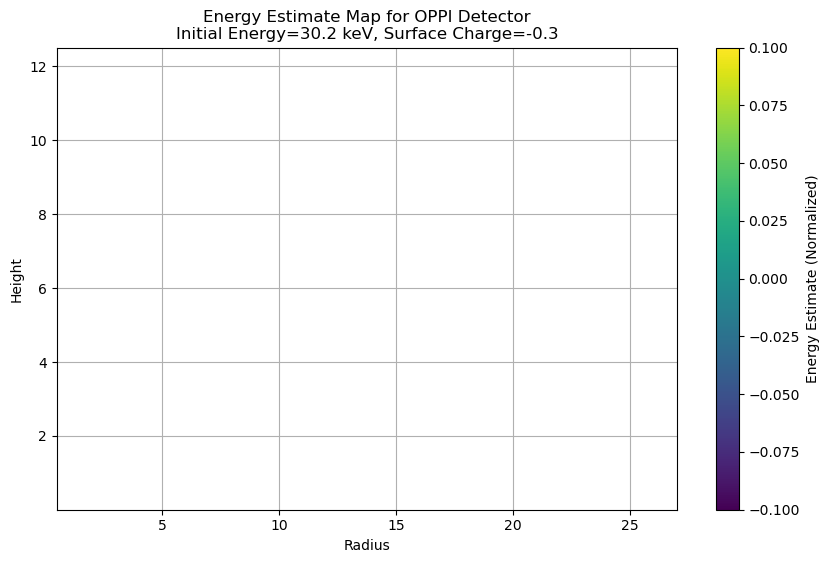

In [17]:
#doesn't work
import numpy as np
from scipy.interpolate import RectBivariateSpline
import matplotlib.pyplot as plt
from matplotlib import cm
from tqdm import tqdm

# Parameters
rise = 100
flat = 200
pickoff = 300
det = "OPPI"
sc = -0.3
eng = 30.2

# Unique radius and height values
unique_radius = np.unique(radius)
unique_height = np.unique(height)

# Create a structured grid
r_grid, z_grid = np.meshgrid(unique_radius, unique_height)
energy_grid = np.empty(r_grid.shape)
energy_grid.fill(np.nan)  # Initialize with NaNs

# Populate the grid with energy_estimate values
for i, r in enumerate(tqdm(unique_radius)):
    for j, z in enumerate(unique_height):
        cut = (radius == r) & (sr == 1) & (height == z) & (grid == 0.0200) & (energy == eng) & (surface_charge == sc) & (detector == det)
        if charge_data[cut].size > 0:
            test_wf = charge_data[cut][0]
            trap_out = np.zeros_like(test_wf)
            trap_norm(test_wf, rise, flat, trap_out)
            energy_grid[j, i] = trap_out[time == pickoff * 10][0]

# Apply RectBivariateSpline
spl = RectBivariateSpline(unique_height, unique_radius, energy_grid)

# Evaluate the spline over the grid
energy_interp = spl.ev(z_grid.ravel(), r_grid.ravel()).reshape(z_grid.shape)

# Create the heatmap
plt.figure(figsize=(10, 6))
heatmap = plt.pcolormesh(r_grid, z_grid, energy_interp, cmap=cm.viridis)
plt.colorbar(heatmap, label='Energy Estimate (Normalized)')
plt.xlabel('Radius')
plt.ylabel('Height')
plt.title('Energy Estimate Map for OPPI Detector\nInitial Energy=30.2 keV, Surface Charge=-0.3')
plt.grid(True)
plt.show()


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 319/319 [00:00<00:00, 11605.07it/s]


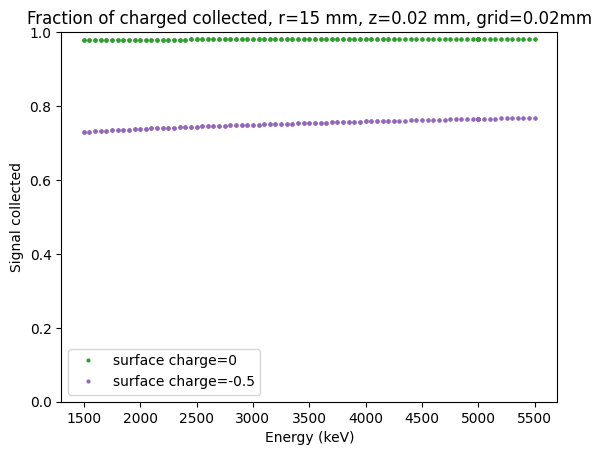

In [157]:
eng_sc_0=np.array([])
plot_e_sc_0=np.array([])
plot_e_sc_n0p5=np.array([])
plot_e_sc_p0p5=np.array([])
eng_sc_n0p5=np.array([])
eng_sc_p0p5=np.array([])
# surface_charge_vars=np.array([0 ,-0.5, 0.5])
# for sc_var in tqdm(surface_charge_vars):


    #                 plot_e_sc_n0p5=np.append(plot_e_sc_n0p5,charge_data[cut&(energy==eng)&(surface_charge==-0.5)][0][len(time)-1])
        #         plot_e_sc_p0p5=np.append(plot_e_sc_p0p5,charge_data[cut&(energy==eng)&(surface_charge==0.5)][0][len(time)-1])
index=0       
for eng in tqdm(energy):
        try:
            plot_e_sc_0=np.append(plot_e_sc_0,charge_data[cut&(energy==eng)&(surface_charge==0)][0][len(time)-1])
            eng_sc_0=np.append(eng_sc_0,eng)
        except IndexError:
            continue
            try:
                plot_e_sc_p0p5=np.append(plot_e_sc_p0p5,charge_data[cut&(energy==eng)&(surface_charge==0.5)][0][len(time)-1])
                eng_sc_p0p5=np.append(eng_sc_p0p5,eng)
            except IndexError:
                continue
        try:
            plot_e_sc_n0p5=np.append(plot_e_sc_n0p5,charge_data[cut&(energy==eng)&(surface_charge==-0.5)][0][len(time)-1])
            eng_sc_n0p5=np.append(eng_sc_n0p5,eng)
        except IndexError:
            continue
plt.plot(eng_sc_0, plot_e_sc_0,'o',markersize=2, color='tab:green')
plt.plot(eng_sc_n0p5, plot_e_sc_n0p5,'o',markersize=2, color='tab:purple')
plt.plot(eng_sc_p0p5, plot_e_sc_p0p5,'o',markersize=2, color='tab:orange')

plt.ylabel('Signal collected')
plt.xlabel('Energy (keV)')
plt.ylim(0,1)
plt.legend(['surface charge=0', 'surface charge=-0.5'])
plt.title('Fraction of charged collected, r=15 mm, z=0.02 mm, grid=0.02mm')
plt.show()

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 319/319 [00:00<00:00, 9402.02it/s]


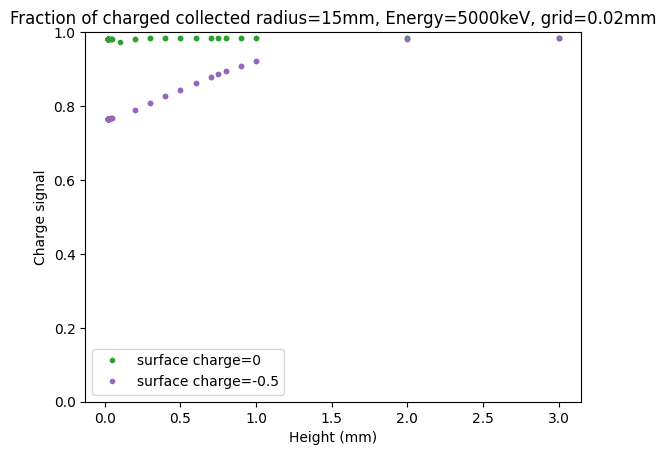

In [159]:
z_sc0=np.array([])
z_scp0p5=np.array([])
z_scnop5=np.array([])
plot_z_sco=np.array([])
plot_z_scp0p5=np.array([])
plot_z_scn0p5=np.array([])

for z in tqdm(height):
    cut = (radius==15.00)&(sr==1)&(height==z)&(grid==0.02)&(energy==5000.00)
    try:
        plot_z_sco=np.append(plot_z_sco,charge_data[cut&(surface_charge==0)][0][len(time)-1])
        z_sc0=np.append(z_sc0,z)
    except IndexError:
        continue
    try:
        plot_z_scn0p5=np.append(plot_z_scn0p5,charge_data[cut&(surface_charge==-0.5)][0][len(time)-1])
        z_scnop5=np.append(z_scnop5,z)
    except IndexError:
        continue
    try:
        plot_z_scp0p5=np.append(plot_z_scp0p5,charge_data[cut&(surface_charge==0.5)][0][len(time)-1])
        z_scp0p5=np.append(z_scp0p5,z)
    except IndexError:
        continue



plt.plot(z_sc0, plot_z_sco,'o',markersize=3, color="tab:green")#could use color=plt.cm.jet(z/max(height))
plt.plot(z_scnop5, plot_z_scn0p5,'o',markersize=3, color="tab:purple")#could use color=plt.cm.jet(z/max(height))

plt.ylabel('Charge signal')
plt.xlabel('Height (mm)')
plt.ylim(0,1)

# plt.legend(['with self-repulsion', 'without self-repulsion'])
plt.title('Fraction of charged collected radius=15mm, Energy=5000keV, grid=0.02mm')
plt.legend(['surface charge=0', 'surface charge=-0.5'])
plt.show()

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 319/319 [00:00<00:00, 9564.40it/s]


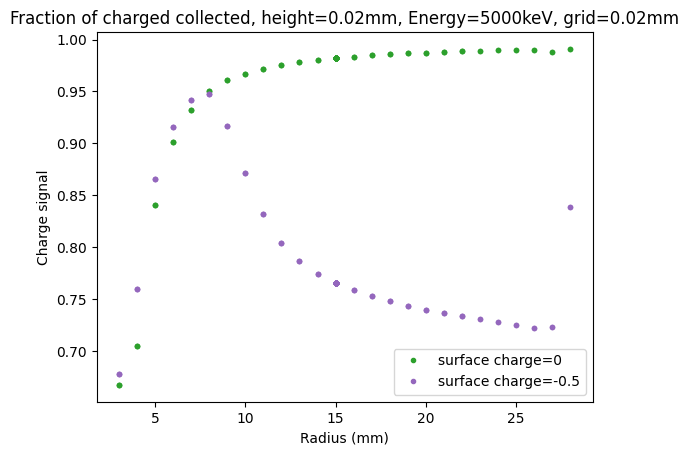

In [160]:
r_sc0=np.array([])
r_scp0p5=np.array([])
r_scn0p5=np.array([])
plot_r_sco=np.array([])
plot_r_scp0p5=np.array([])
plot_r_scn0p5=np.array([])

for r in tqdm(radius):
    cut = (height==0.02)&(sr==1)&(radius==r)&(grid==0.02)&(energy==5000.00)
    try:
        plot_r_sco=np.append(plot_r_sco,charge_data[cut&(surface_charge==0)][0][len(time)-1])
        r_sc0=np.append(r_sc0,r)
    except IndexError:
        continue
    try:
        plot_r_scn0p5=np.append(plot_r_scn0p5,charge_data[cut&(surface_charge==-0.50)][0][len(time)-1])
        r_scn0p5=np.append(r_scn0p5,r)
    except IndexError:
        continue
    try:
        plot_r_scp0p5=np.append(plot_r_scp0p5,charge_data[cut&(surface_charge==0.50)][0][len(time)-1])
        r_scp0p5=np.append(r_scp0p5,r)
    except IndexError:
        continue
    
    

plt.plot(r_sc0, plot_r_sco,'o',markersize=3, color="tab:green")
plt.plot(r_scn0p5, plot_r_scn0p5,'o',markersize=3, color="tab:purple")
# plt.plot(r_scp0p5, plot_r_scp0p5,'o',markersize=5, color="tab:blue")

plt.ylabel('Charge signal')
plt.xlabel('Radius (mm)')
# plt.legend(['with self-repulsion', 'without self-repulsion'])
plt.title('Fraction of charged collected, height=0.02mm, Energy=5000keV, grid=0.02mm')
plt.legend(['surface charge=0', 'surface charge=-0.5'])

plt.show()

In [109]:
r_plot = np.array([])
z_plot = np.array([])
eng_plot = np.array([])
eng_use = 5000

In [110]:
for r in tqdm(radius[0::10]):
    for z in height[0::10]:
        cut = (height==z)&(sr==1)&(radius==r)&(grid==0.02)&(energy==eng_use)
        try:
            pick_off = charge_data[cut][0][len(time)-1]
            r_plot = np.append(r_plot, r)
            z_plot = np.append(z_plot, z)
            eng_plot = np.append(eng_plot, pick_off)
            #plt.plot(radius[cut], height[cut],'o', color=plt.cm.jet(pick_off))
        except IndexError:
#             print("Point skipped:(", r,",", z,")")
            continue

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 876.92it/s]


In [87]:
from  pygama.dsp.processors.trap_filters import trap_filter
from  pygama.dsp.processors.trap_filters import trap_norm

sim_time=11000
time_step_calc = 0.2
n_iter = sim_time/time_step_calc
step_time_out = 1 #out every step for now
time = np.linspace(start=0, stop= n_iter*time_step_calc - step_time_out*time_step_calc, num= (int) (n_iter/step_time_out))

trap_in = np.loadtxt('/Users/kevinhbhimani/Desktop/siggen_ccd/waveforms/5000.00_keV/grid_0.0200/self_repulsion_1/P42575A/q=0.00/signal_r=15.00_phi=0.00_z=0.10.txt')
assert len(trap_in) == len(time)

plt.plot(time,trap_in)
plt.ylabel('Charge signal')
plt.xlabel('Time (ns)')
# plt.legend(['with self-repulsion', 'without self-repulsion'])
# plt.title('Max energy using SR - max energy without SR at radius=25.00')
# plt.legend(['z=0.05','z=0.10','z=0.15','z=0.20','z=0.50','z=1.00','z=2.00','z=3.00','z=5.00','z=10.00'])

# rise time of 4 us and a flat top of 2.5 us. We pick off the energy at 6 us from the start time
# Parameters
# w_in (ndarray) -- the input waveform.

# rise (int) -- the number of samples averaged in the rise and fall sections.

# flat (int) -- the delay between the rise and fall sections.

# w_out (ndarray) -- the filtered waveform
rise_time = 4000 #ns
flat_top = 2500 #ns
pickup = 6000 #ns
trap_out = np.zeros(len(trap_in))
trap_norm(trap_in, int(rise_time/time_step_calc), int(flat_top/time_step_calc), trap_out)

plt.plot(time,trap_in)
plt.plot(time,trap_out)
plt.axvline(x=pickup, color='r')
print("energy collected at pickup", trap_out[(int)(pickup/time_step_calc)])
plt.ylabel('Charge signal')
plt.xlabel('Time (ns)')
plt.legend(['Waveform','Trap out', 'pick off'])
plt.title('Event with Energy = 5000 keV at $r=15.00$ mm, $r=0.10$ mm')

ModuleNotFoundError: No module named 'pygama'

In [ ]:
# index=0
# for r in tqdm(range(0,len(z_plot))):
#     plt.plot(r[index], z[index],'o', color=plt.cm.jet(eng_plot[index]))
#     index = index + 1
# plt.ylabel('Height (mm)')
# plt.xlabel('Radius (mm)')
# # plt.legend(['with self-repulsion', 'without self-repulsion'])
# plt.title('Fraction of charged collected, Energy=50.00 keV')
# plt.show()

In [ ]:
plt.scatter(r_plot[0:len(z_plot)],z_plot, c=eng_plot, cmap='summer_r') #_r reverses the colormap
plt.ylabel('Height (mm)')
plt.xlabel('Radius (mm)')
# plt.legend(['with self-repulsion', 'without self-repulsion'])
plt.title(f'Fraction of charged collected, Energy={eng_use}keV')
plt.colorbar()
plt.show()

In [ ]:
r_use = 15
eng_use = 5000
for z in height:
    cut = (height==z)&(sr==1)&(radius==r_use)&(grid==0.02)&(energy==eng_use)
    pick_off = charge_data[cut][0][len(time)-1]
    plt.plot(z, pick_off, 'o', color='tab:purple')
plt.ylabel('Fraction of charge collected (mm)')
plt.xlabel('Height (mm)')
# plt.legend(['with self-repulsion', 'without self-repulsion'])
plt.title(f'Fraction of charged collected, radius={r_use}, Energy={eng_use}keV')
plt.show()

In [ ]:
z_use = 0.05
eng_use = 800
for r in radius:
    try:
        cut = (radius==r)&(sr==1)&(height==z_use)&(grid==0.02)&(energy==eng_use)
        pick_off = charge_data[cut][0][len(time)-1]
        plt.plot(r, pick_off, 'o', color='tab:green')
    except IndexError:
        continue
plt.ylabel('Fraction of charge collected (mm)')
plt.xlabel('Radius (mm)')
# plt.legend(['with self-repulsion', 'without self-repulsion'])
plt.title(f'Fraction of charged collected, height={z_use}, Energy={eng_use}keV')
plt.show()

In [58]:
# # qnop5_data_r15= np.loadtxt('/Users/kevinhbhimani/Desktop/siggen_ccd/waveforms/5000.00_keV/grid_0.0200/self_repulsion_1/P42575A/q=-0.10/signal_r=15.00_phi=0.00_z=0.10.txt')

# # index_cut = (int)((time_step_calc*n_iter)/step_time_out)

# # q0_data_old_r15 = np.loadtxt('/Users/kevinhbhimani/Desktop/siggen_sims/CPU_version/icpc_siggen/Signals/2D_comparision/test/signal_r=15.00_phi=0.00_z=0.10.txt')

# # n_iter = 4000
# # time_step_calc = 0.2
# # step_time_out = 10

# # time_old = np.linspace(start=0, stop=n_iter-1, num=n_iter)
# # index_cut = (int)((time_step_calc*n_iter)/step_time_out)
# # plt.plot(time[0:len(time)-1], qnop5_data_r15[1:],'-',markersize=2,color='tab:red')
# # plt.plot(time_old[0:len(q0_data_old_r15)][time_old<980], q0_data_old_r15[0:len(q0_data_old_r15)][time_old<980],'-',markersize=2,color='tab:blue')

# # plt.title('Simulated signal at $r=15, z=0.10$,Surface charge=-0.1\n surface drift=0.01 bulk, Energy=5000 keV')
# # plt.xlabel('Time (ns)')
# # plt.ylabel('Fraction of charge collected')
# # plt.legend(['EH Drift Sim', 'Siggen Sim'])
# # #plt.savefig('/Users/kevinhbhimani/Desktop/Thesis_proposal_figs/sims_comp.png')

# # plt.show()

# # q0_data_r15= np.loadtxt('/Users/kevinhbhimani/Desktop/siggen_sims/siggen_ccd_ll/waveforms/5000.00_keV/grid_0.0200/self_repulsion_1/P42575A/q=0.00/signal_r=15.00_phi=0.00_z=0.10.txt')
# # q0_data_old_r15 = np.loadtxt('/Users/kevinhbhimani/desktop/siggen_sims/CPU_version/icpc_siggen/Signals/2D_comparision/q=0/signal_r=15.0_phi=0.0_z=0.1.txt')
# # assert len(q0_data_r15)==len(time),"lengths do not match up"
# # # assert len(q0_data_old_r15)==len(time),"lengths do not match up"

# # time_cut_lb = 500
# # time_cut_ub = 800
# # plt.plot(time[(time>time_cut_lb) & (time<time_cut_ub)],q0_data_old_r15[(time>time_cut_lb) & (time<time_cut_ub)],'-',markersize=2,color='tab:blue')
# # plt.plot(time[(time>time_cut_lb) & (time<time_cut_ub)],q0_data_r15[(time>time_cut_lb) & (time<time_cut_ub)],'-',markersize=2,color='tab:red')

# plt.plot(time[0:len(q0_data_old_r15)],q0_data_old_r15[0:len(q0_data_old_r15)],'-',markersize=2,color='tab:blue')
# plt.plot(time[0:len(q0_data_old_r15)],q0_data_r15[0:len(q0_data_old_r15)],'-',markersize=2,color='tab:red')

# #plt.axvline(drift_time_50(np_data,time), color='r', linestyle='dashed', linewidth=1)
# #plt.axvline(drift_time_50(data_old,time), color='b', linestyle='dashed', linewidth=1)


# plt.title('Simulated signal at $r=15, \\rho=0, z=0.1$')
# plt.xlabel('Time (ns)')
# plt.ylabel('Fraction of charge collected')
# plt.legend(['Siggen Sim', 'EH Drift Sim'])
# #plt.savefig('/Users/kevinhbhimani/Desktop/Thesis_proposal_figs/sims_comp.png')

# plt.show()